# 使用PCA降噪

## 回忆之前的例子

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0.0, 100.0, size=100)
X[:,1] = 0.75 * X[:, 0] + 3.0 + np.random.normal(0, 5.0, size=100)

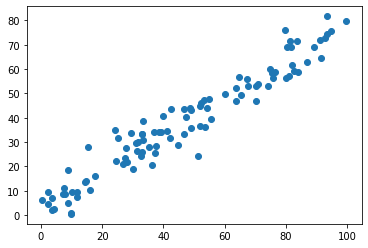

In [28]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

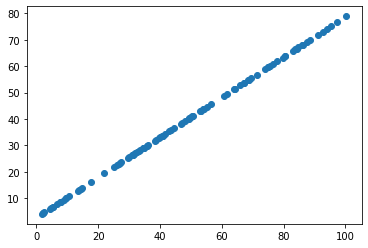

In [30]:
plt.scatter(X_restore[:,0], X_restore[:,1])
plt.show()

## 手写识别的例子

In [31]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
Y = digits.target

In [32]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)
noisy_digits.shape

(1797, 64)

In [33]:
example_digits = noisy_digits[Y==0, :][:10]

for num in range(1, 10):
    X_num = noisy_digits[Y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

example_digits.shape

(100, 64)

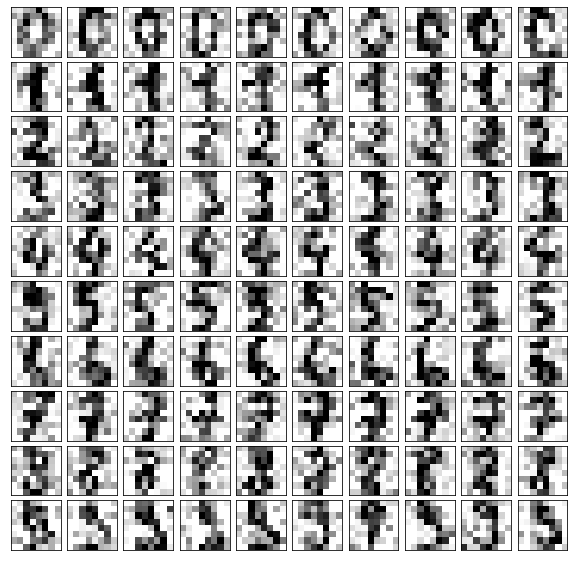

In [34]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

    plt.show()

plot_digits(example_digits)


In [35]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca.n_components_

12

In [37]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
filtered_digits.shape

(100, 64)

In [ ]:
plot_digits(filtered_digits)